In [1]:
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages

base = importr('base')
utils = importr('utils')
utils.chooseCRANmirror(ind=1)
utils.install_packages('POT') #installing POT package

rpy2.rinterface.NULL

In [ ]:
import pandas as pd #importing pandas

from thresholdmodeling import thresh_modeling #importing package

In [32]:
import os
import numpy as np

In [33]:
path='E:\program'
os.chdir(path)

In [34]:
inputFolder=r'CMIP\model_4_585_total'

In [75]:
subbassins=52
model=[[] for _ in range(subbassins)]
for j in range(20,50): #2040-2060 (25,45)
    file=os.listdir(inputFolder)[j]
    for i in np.arange(0,subbassins): #(subbassins)
        file_path1=os.path.join(inputFolder, file)
        df1 = pd.read_csv(file_path1,index_col='name')
        model[i].append(df1.iloc[i,:].values.tolist())


In [76]:
flat_list=[[] for _ in range(subbassins)]
for i in range(52):
    flat_list[i] = [item for sublist in model[i] for item in sublist]
    

In [78]:
len(flat_list[1])

10950

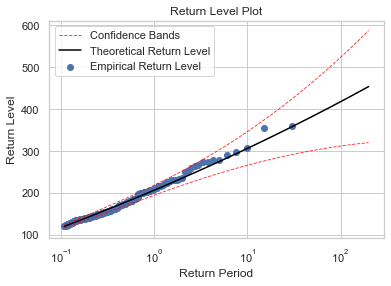

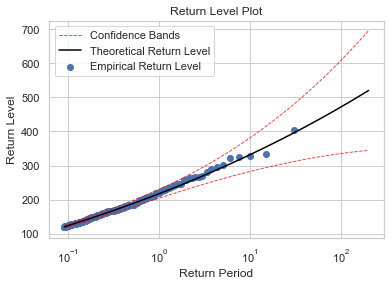

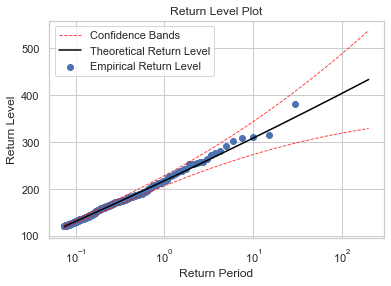

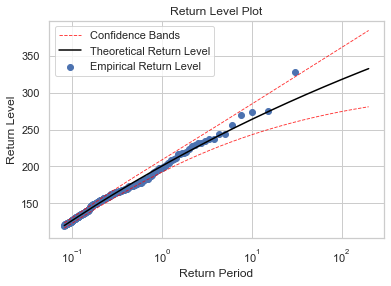

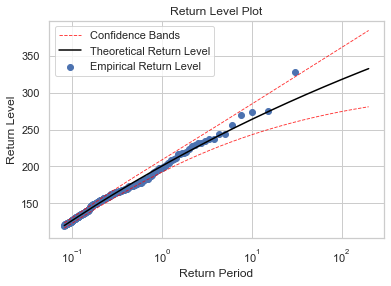

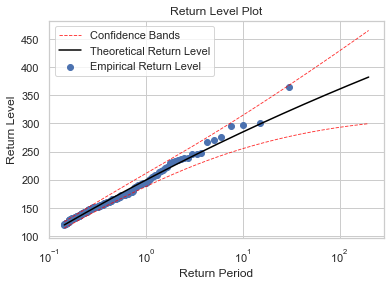

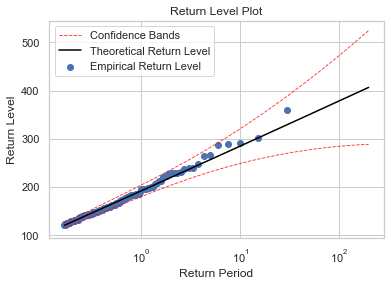

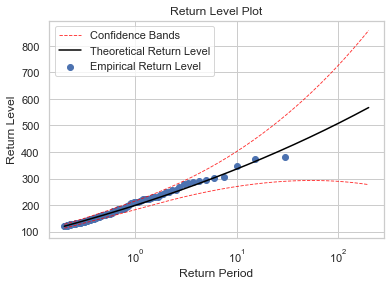

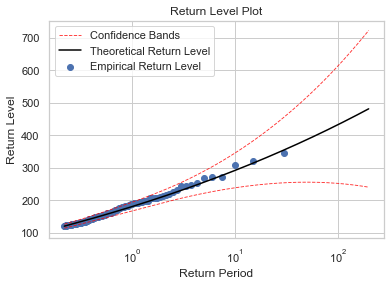

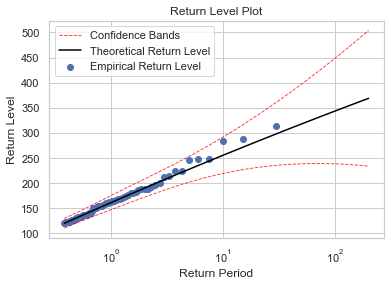

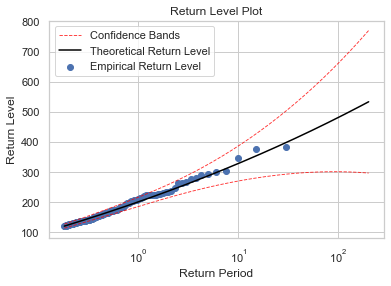

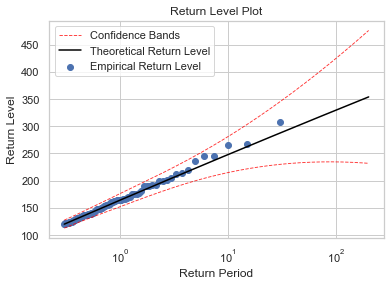

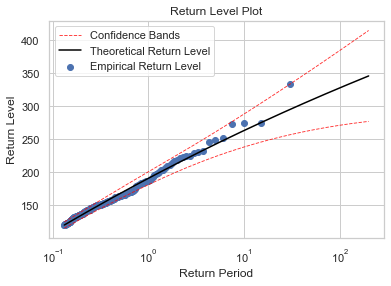

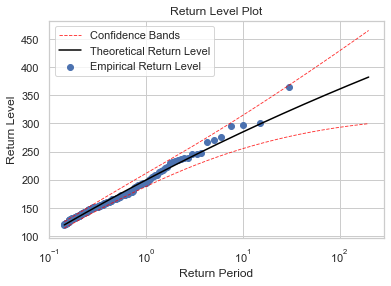

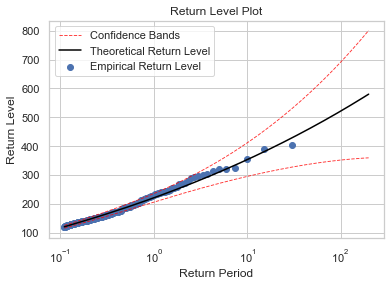

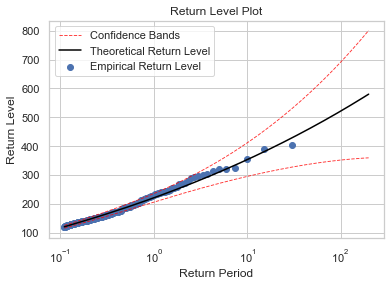

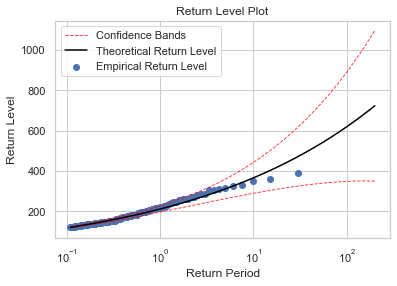

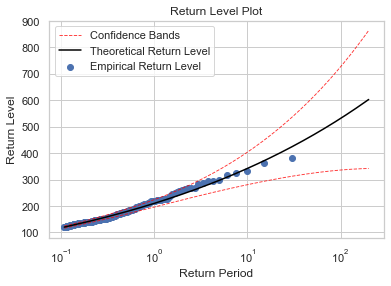

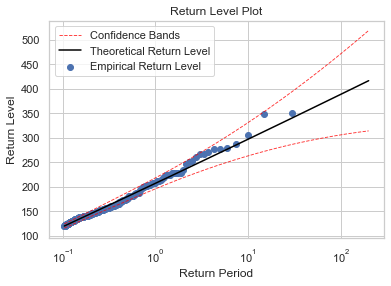

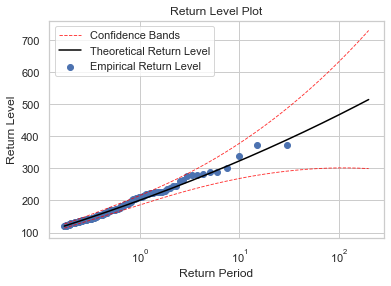

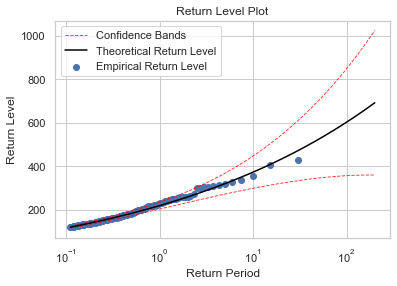

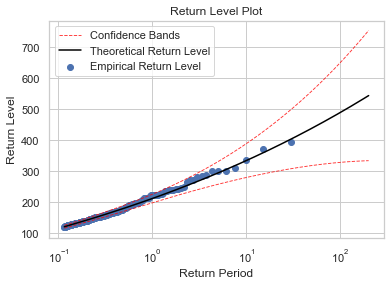

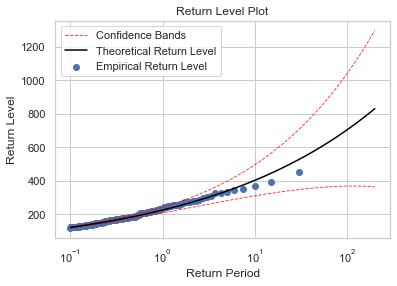

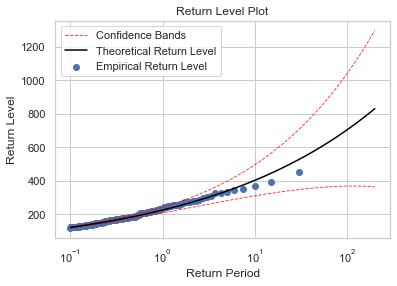

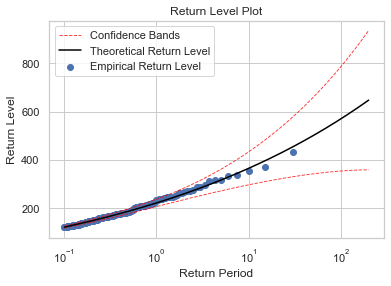

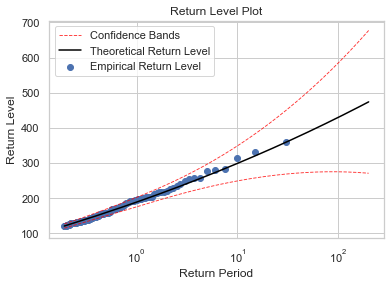

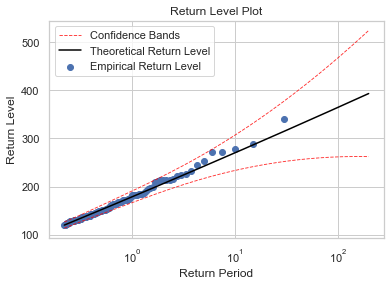

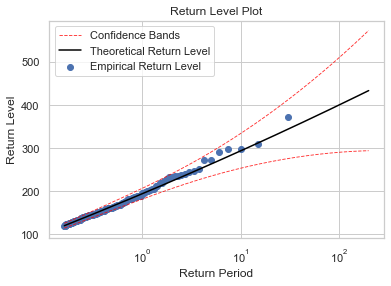

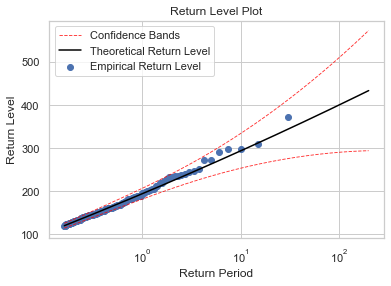

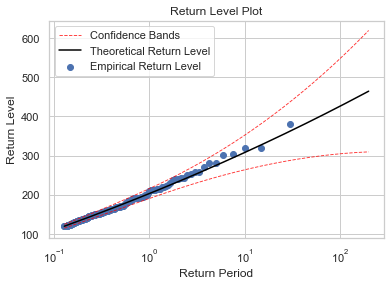

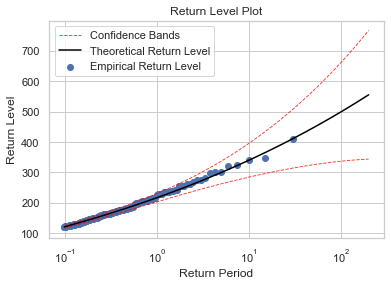

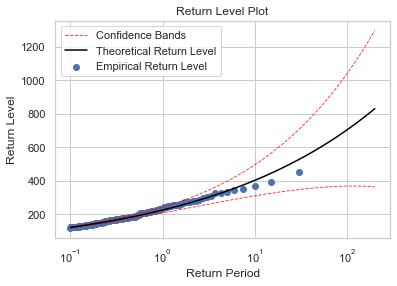

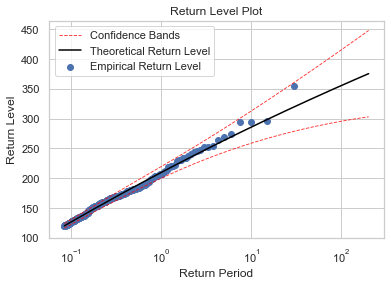

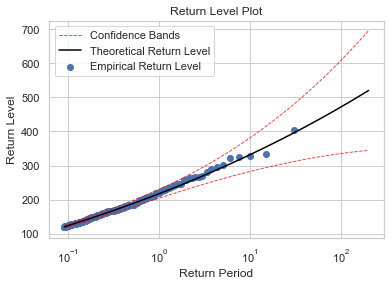

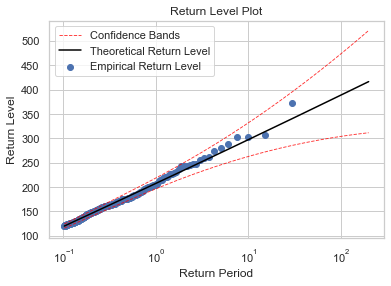

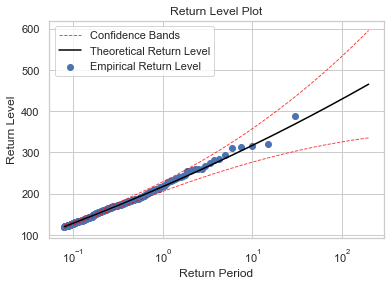

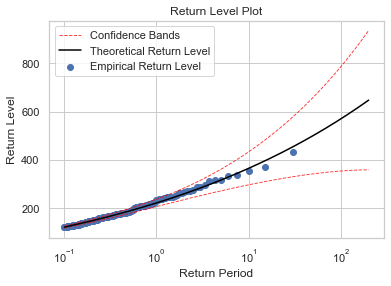

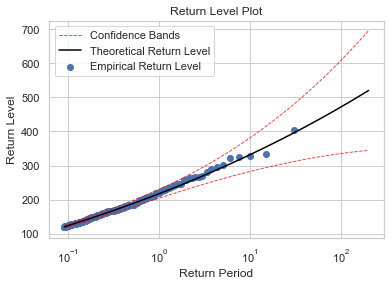

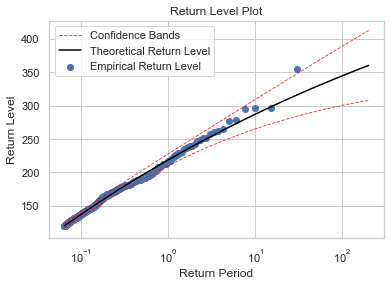

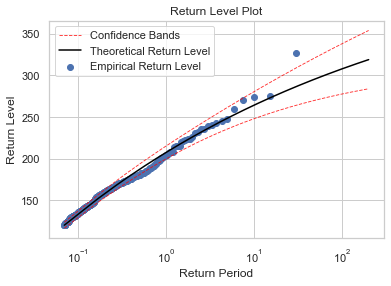

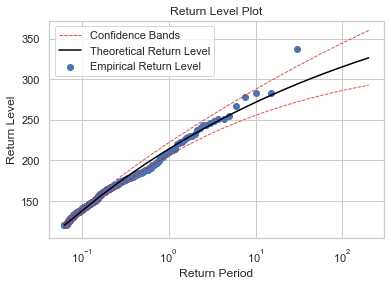

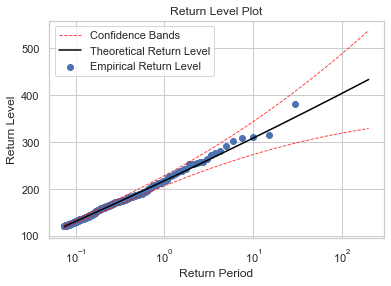

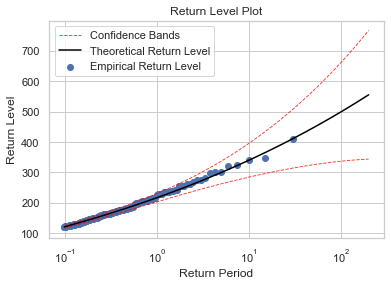

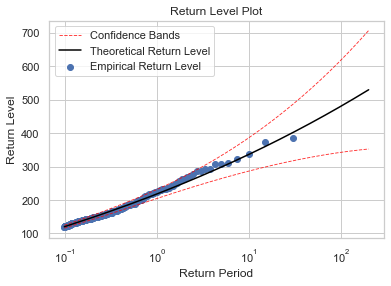

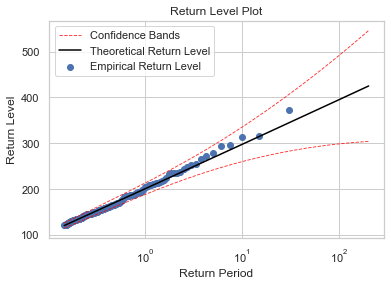

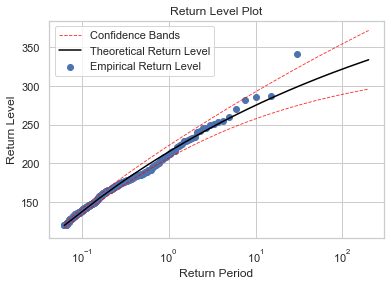

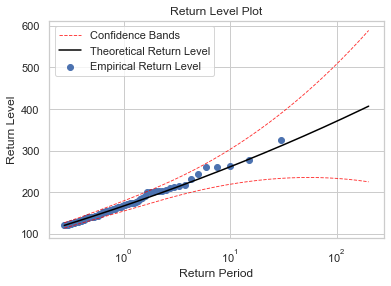

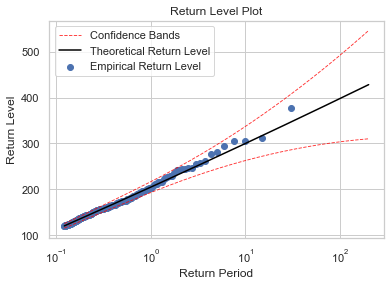

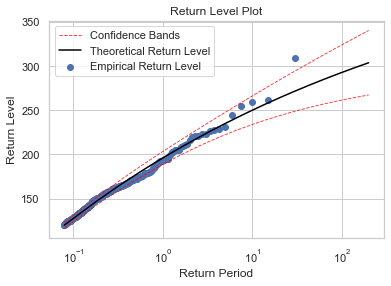

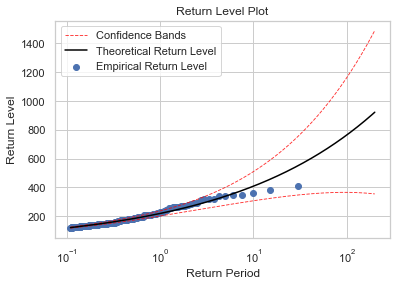

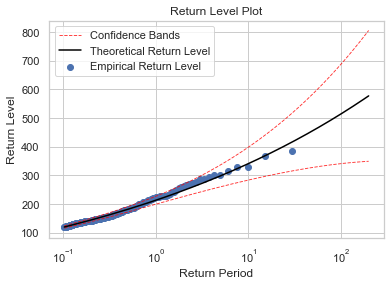

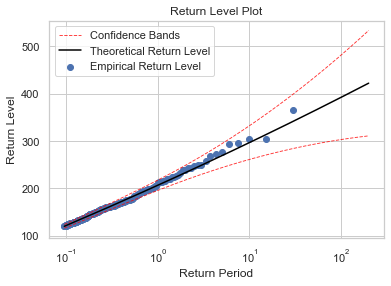

In [94]:
df_200_return_period=pd.DataFrame()
df_200_return_period.index=df1.index
df_200_return_period["200-year return level [2035-2065]"]=''
for i in range(52):
    data=flat_list[i]
    with Capturing() as output:
        thresh_modeling.return_value(data, 120, 0.05, 365, 73000, 'mle')
    a=output[0].split("is ")
    data2=a[1]
    df_200_return_period.iloc[i,0]=data2

In [95]:
df_200_return_period

,200-year return level [2040-2060]
name,
Subbasin-577,453.75050079139226 ± 133.88874734182792
Subbasin-401,520.4955122507356 ± 176.0441646879743
Subbasin-4,433.2530388449298 ± 104.45545360695336
Subbasin-10,332.5801182634664 ± 51.671145974961725
Subbasin-15,332.5801182634664 ± 51.671145974961725
Subbasin-28,382.3538221947324 ± 82.68345625614965
Subbasin-48,406.6807782936788 ± 118.22611637182484
Subbasin-52,567.6568369643647 ± 290.7058531767152
Subbasin-63,480.7289195678456 ± 240.84881884246153


In [53]:
data=flat_list

In [71]:
from io import StringIO 
import sys

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

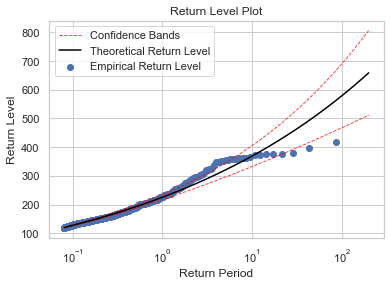

In [73]:
with Capturing() as output:
    thresh_modeling.return_value(data, 120, 0.05, 365, 73000, 'mle')

In [88]:
a=output[0].split("is ")
a[1]

'520.4955122507356 ± 176.0441646879743'

In [55]:
thresh_modeling.MRL?

Signature: thresh_modeling.MRL(sample, alpha)
Docstring: <no docstring>
File:      c:\users\quint\anaconda3\envs\gds\lib\site-packages\thresholdmodeling\thresh_modeling.py
Type:      function


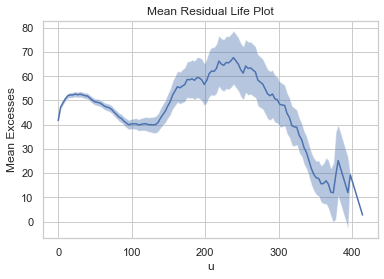

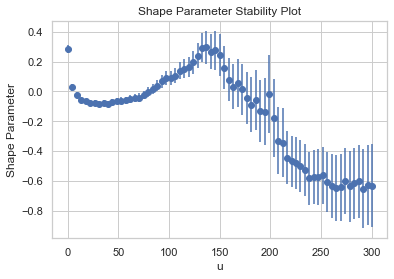

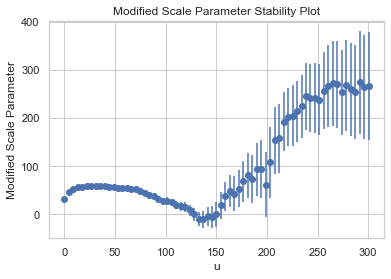

In [57]:
thresh_modeling.MRL(data, 0.05)   
thresh_modeling.Parameter_Stability_plot(data, 0.05)

In [65]:
thresh_modeling.gpdfit(data, 100, 'mle')

Estimator: MLE 

 Deviance: 16539.17 

      AIC: 16543.17 



Varying Threshold: FALSE 



  Threshold Call: 100L 

    Number Above: 1761 

Proportion Above: 0.0561 



Estimates

   scale     shape  

36.86080   0.08896  



Standard Error Type: observed 



Standard Errors

  scale    shape  

1.25046  0.02423  



Asymptotic Variance Covariance

       scale       shape     

scale   1.5636563  -0.0196166

shape  -0.0196166   0.0005871



Optimization Information

  Convergence: successful 

  Function Evaluations: 17 

  Gradient Evaluations: 6 





(0.08896027072921775,
 36.860799293740975,
 array([  0.  ,   0.  ,   0.  , ..., 378.07, 395.68, 416.98]),
 [0.01999999999999602,
  0.04999999999999716,
  0.06999999999999318,
  0.06999999999999318,
  0.0799999999999983,
  0.09000000000000341,
  0.12000000000000455,
  0.12000000000000455,
  0.15000000000000568,
  0.1700000000000017,
  0.18999999999999773,
  0.20000000000000284,
  0.25,
  0.2600000000000051,
  0.2600000000000051,
  0.3100000000000023,
  0.3400000000000034,
  0.3400000000000034,
  0.35999999999999943,
  0.37999999999999545,
  0.39000000000000057,
  0.4000000000000057,
  0.4099999999999966,
  0.4300000000000068,
  0.5,
  0.5100000000000051,
  0.519999999999996,
  0.5999999999999943,
  0.6200000000000045,
  0.6599999999999966,
  0.6599999999999966,
  0.6700000000000017,
  0.7000000000000028,
  0.7199999999999989,
  0.7199999999999989,
  0.75,
  0.75,
  0.7999999999999972,
  0.8400000000000034,
  0.8599999999999994,
  0.8700000000000045,
  0.8799999999999955,
  0.89000000000

Estimator: moments 



Varying Threshold: FALSE 



  Threshold Call: 100L 

    Number Above: 1761 

Proportion Above: 0.0561 



Estimates

   scale     shape  

36.60573   0.09559  



Standard Error Type: 



Standard Errors

 scale   shape  

1.3686  0.0286  



Asymptotic Variance Covariance

       scale      shape    

scale   1.872958  -0.028071

shape  -0.028071   0.000818



Correlation

       scale    shape  

scale   1.0000  -0.7171

shape  -0.7171   1.0000



Optimization Information

  Convergence: NA 

  Function Evaluations: NA 





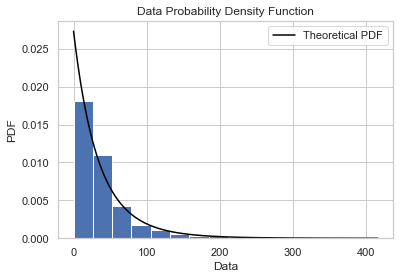

Estimator: MLE 

 Deviance: 16539.17 

      AIC: 16543.17 



Varying Threshold: FALSE 



  Threshold Call: 100L 

    Number Above: 1761 

Proportion Above: 0.0561 



Estimates

   scale     shape  

36.86080   0.08896  



Standard Error Type: observed 



Standard Errors

  scale    shape  

1.25046  0.02423  



Asymptotic Variance Covariance

       scale       shape     

scale   1.5636563  -0.0196166

shape  -0.0196166   0.0005871



Optimization Information

  Convergence: successful 

  Function Evaluations: 17 

  Gradient Evaluations: 6 





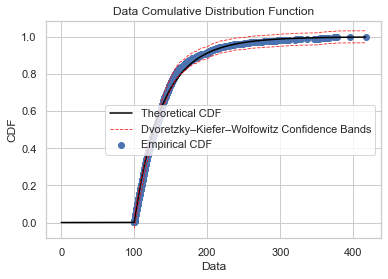

Estimator: MLE 

 Deviance: 16539.17 

      AIC: 16543.17 



Varying Threshold: FALSE 



  Threshold Call: 100L 

    Number Above: 1761 

Proportion Above: 0.0561 



Estimates

   scale     shape  

36.86080   0.08896  



Standard Error Type: observed 



Standard Errors

  scale    shape  

1.25046  0.02423  



Asymptotic Variance Covariance

       scale       shape     

scale   1.5636563  -0.0196166

shape  -0.0196166   0.0005871



Optimization Information

  Convergence: successful 

  Function Evaluations: 17 

  Gradient Evaluations: 6 





C:\Users\Quint\anaconda3\envs\gds\lib\site-packages\thresholdmodeling\thresh_modeling.py:194: RuntimeWarning: invalid value encountered in double_scalars
  CI_qq_high.append(threshold + ((scale/shape)*(((1-((F2)/(1)))**-shape) - 1)))
C:\Users\Quint\anaconda3\envs\gds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


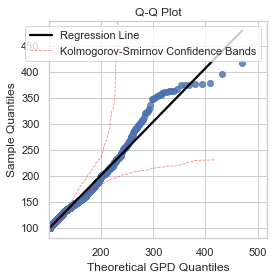

Estimator: MLE 

 Deviance: 16539.17 

      AIC: 16543.17 



Varying Threshold: FALSE 



  Threshold Call: 100L 

    Number Above: 1761 

Proportion Above: 0.0561 



Estimates

   scale     shape  

36.86080   0.08896  



Standard Error Type: observed 



Standard Errors

  scale    shape  

1.25046  0.02423  



Asymptotic Variance Covariance

       scale       shape     

scale   1.5636563  -0.0196166

shape  -0.0196166   0.0005871



Optimization Information

  Convergence: successful 

  Function Evaluations: 17 

  Gradient Evaluations: 6 





C:\Users\Quint\anaconda3\envs\gds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


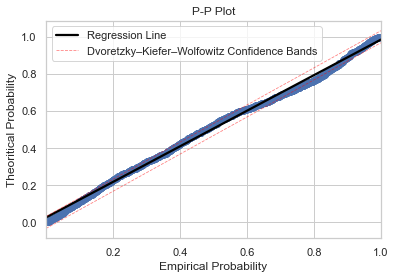

In [62]:
thresh_modeling.gpdpdf(data, 100, 'moments', 'sturges', 0.05)
thresh_modeling.gpdcdf(data, 100, 'mle', 0.05)
thresh_modeling.qqplot(data,100, 'mle', 0.05)
thresh_modeling.ppplot(data, 100, 'mle', 0.05)

The return value for the given return period is 658.7426109607213 ± 147.56263268529395


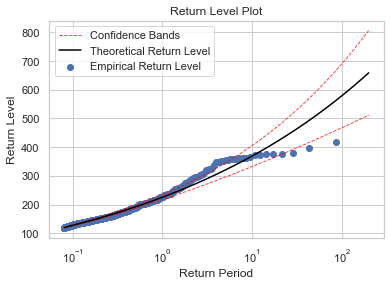

In [64]:
thresh_modeling.return_value(data, 120, 0.05, 365, 73000, 'mle')

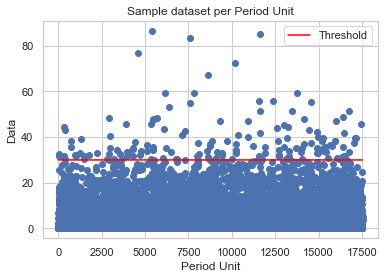

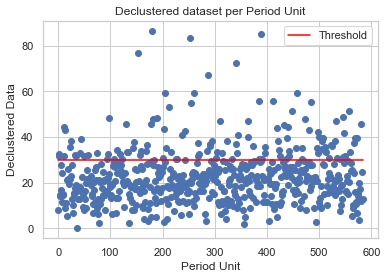

In [7]:
thresh_modeling.decluster(data, 30, 30)